### Importación de datos



In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [89]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [90]:
# Agregar nombre de tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los dataframes
df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [91]:
df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [92]:
# Número de categorías distintas
df_tiendas['Categoría del Producto'].nunique()

8

In [93]:
# Número de productos distintos
df_tiendas['Producto'].nunique()

51

#1. Análisis de facturación



In [94]:
# Ingreso total por tienda
ingresos = df_tiendas.groupby('Tienda')['Precio'].sum().reset_index()

# Mostrar formateado sin cambiar el DataFrame original
print("\nIngreso total por tienda:")
for _, row in ingresos.iterrows():
    print(f"{row['Tienda']}: ${row['Precio']:,.0f}")


Ingreso total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


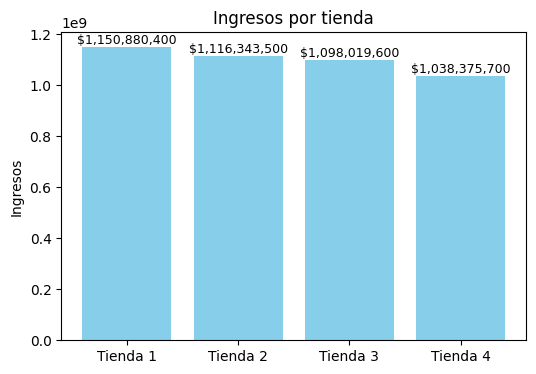

In [95]:
# Ingresos por tienda con valores arriba de las barras
plt.figure(figsize=(6,4))
bars = plt.bar(ingresos['Tienda'], ingresos['Precio'], color='skyblue')
plt.title('Ingresos por tienda')
plt.ylabel('Ingresos')

# Agregar etiquetas de valor sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición horizontal centrada
        height,                           # posición vertical sobre la barra
        f"${height:,.0f}",                 # formato con $
        ha='center', va='bottom', fontsize=9
    )

plt.show()

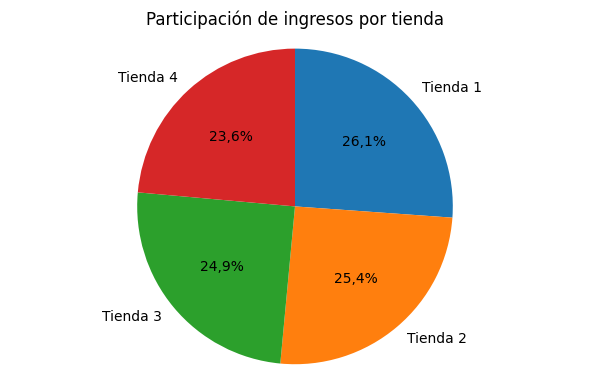

In [96]:
# Gráfico de torta: participación de ingresos por tienda
labels = ingresos['Tienda']
sizes = ingresos['Precio'].values

fig, ax = plt.subplots(figsize=(6,4))
ax.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%'.replace('.', ','),  # porcentaje con coma
    startangle=90,
    counterclock=False
)
ax.set_title('Participación de ingresos por tienda')
ax.axis('equal')  # círculo perfecto
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [97]:
# Contar cuántos productos se vendieron por categoría (todas las tiendas)
categorias_mas_vendidas = df_tiendas['Categoría del Producto'].value_counts().reset_index()
categorias_mas_vendidas.columns = ['Categoría del Producto', 'Cantidad Vendida']

# Mostrar la tabla
print("Categorías más vendidas (total general):")
print(categorias_mas_vendidas)

Categorías más vendidas (total general):
    Categoría del Producto  Cantidad Vendida
0                  Muebles              1886
1             Electrónicos              1772
2                 Juguetes              1290
3        Electrodomésticos              1149
4     Deportes y diversión              1113
5   Instrumentos musicales               753
6                   Libros               742
7  Artículos para el hogar               730


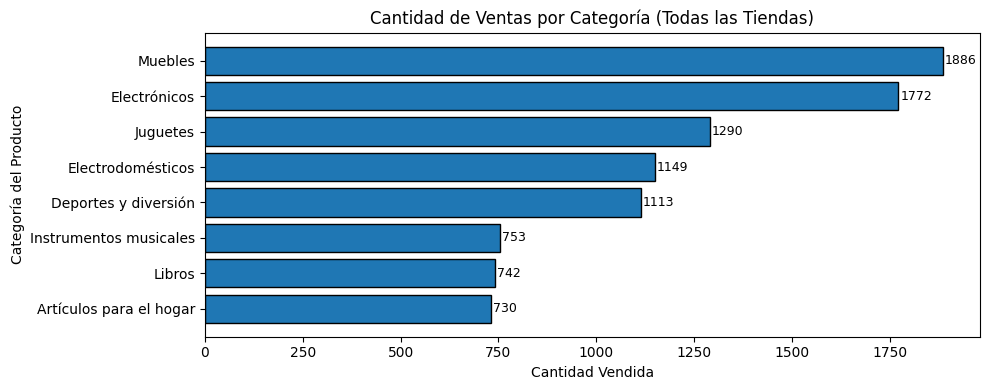

In [98]:
import matplotlib.pyplot as plt

# Gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 4))
ax.barh(categorias_mas_vendidas['Categoría del Producto'],
        categorias_mas_vendidas['Cantidad Vendida'],
        edgecolor='black')

# Estilo del gráfico
ax.set_title('Cantidad de Ventas por Categoría (Todas las Tiendas)')
ax.set_xlabel('Cantidad Vendida')
ax.set_ylabel('Categoría del Producto')

# Invertir el eje Y para que la categoría con más ventas quede arriba
ax.invert_yaxis()

# Etiquetas de valor al final de cada barra
for i, v in enumerate(categorias_mas_vendidas['Cantidad Vendida']):
    ax.text(v + 5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [99]:
# Contar cuántos productos se vendieron por categoría y tienda
categorias_por_tienda = df_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad')

# Mostrar la tabla ordenada por tienda y cantidad
categorias_por_tienda = categorias_por_tienda.sort_values(by=['Tienda', 'Cantidad'], ascending=[True, False])

print("Cantidad Ventas por Categoría por tienda:")
print(categorias_por_tienda)

Cantidad Ventas por Categoría por tienda:
      Tienda   Categoría del Producto  Cantidad
7   Tienda 1                  Muebles       465
3   Tienda 1             Electrónicos       448
5   Tienda 1                 Juguetes       324
2   Tienda 1        Electrodomésticos       312
1   Tienda 1     Deportes y diversión       284
4   Tienda 1   Instrumentos musicales       182
6   Tienda 1                   Libros       173
0   Tienda 1  Artículos para el hogar       171
15  Tienda 2                  Muebles       442
11  Tienda 2             Electrónicos       422
13  Tienda 2                 Juguetes       313
10  Tienda 2        Electrodomésticos       305
9   Tienda 2     Deportes y diversión       275
12  Tienda 2   Instrumentos musicales       224
14  Tienda 2                   Libros       197
8   Tienda 2  Artículos para el hogar       181
23  Tienda 3                  Muebles       499
19  Tienda 3             Electrónicos       451
21  Tienda 3                 Juguetes       31

In [100]:
# Calcular ingresos por tienda y categoría
ingresos_por_tienda_cat = (
    df_tiendas
    .groupby(['Tienda', 'Categoría del Producto'], as_index=False)['Precio']
    .sum()
    .rename(columns={'Precio': 'Ingresos'})
)

# Ordenar por tienda y por ingresos (descendente)
ingresos_por_tienda_cat = ingresos_por_tienda_cat.sort_values(
    by=['Tienda', 'Ingresos'], ascending=[True, False]
)

print("Ingresos por Categoría y Tienda:")
print(ingresos_por_tienda_cat)


Ingresos por Categoría y Tienda:
      Tienda   Categoría del Producto     Ingresos
3   Tienda 1             Electrónicos  429493500.0
2   Tienda 1        Electrodomésticos  363685200.0
7   Tienda 1                  Muebles  187633700.0
4   Tienda 1   Instrumentos musicales   91299000.0
1   Tienda 1     Deportes y diversión   39290000.0
5   Tienda 1                 Juguetes   17995700.0
0   Tienda 1  Artículos para el hogar   12698400.0
6   Tienda 1                   Libros    8784900.0
11  Tienda 2             Electrónicos  410831100.0
10  Tienda 2        Electrodomésticos  348567800.0
15  Tienda 2                  Muebles  176426300.0
12  Tienda 2   Instrumentos musicales  104990300.0
9   Tienda 2     Deportes y diversión   34744500.0
13  Tienda 2                 Juguetes   15945400.0
8   Tienda 2  Artículos para el hogar   14746900.0
14  Tienda 2                   Libros   10091200.0
19  Tienda 3             Electrónicos  410775800.0
18  Tienda 3        Electrodomésticos  329237900.

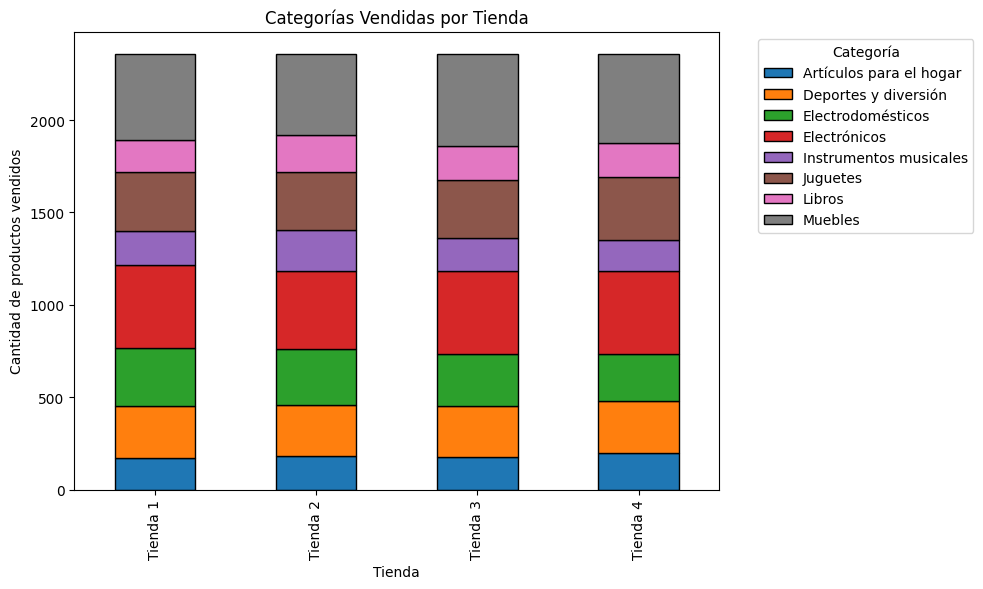

In [101]:
# Gráfico de barras apiladas
pivot_categorias.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')

# Estilo del gráfico
plt.title('Categorías Vendidas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-335500628.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(TOP_N, 'Cantidad'))
/tmp/ipython-input-335500628.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(TOP_N, 'Ingresos'))


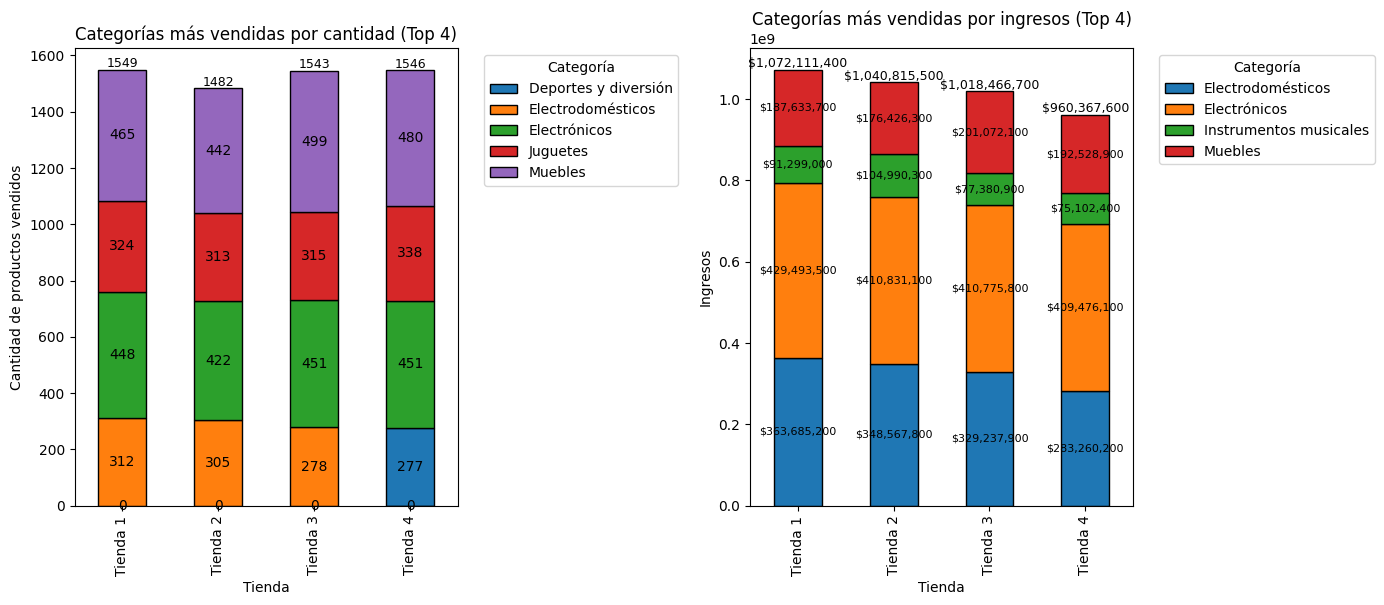

In [118]:
TOP_N = 4  # definir N

# --- Top N por CANTIDAD ---
categorias_top_cant = (categorias_por_tienda
                       .groupby('Tienda', group_keys=False)
                       .apply(lambda g: g.nlargest(TOP_N, 'Cantidad'))
                      )

pivot_cant = categorias_top_cant.pivot(index='Tienda',
                                       columns='Categoría del Producto',
                                       values='Cantidad').fillna(0)

# --- Top N por INGRESOS ---
# Calcular ingresos por tienda y categoría
ingresos_por_tienda_cat = (
    df_tiendas
    .groupby(['Tienda', 'Categoría del Producto'], as_index=False)['Precio']
    .sum()
    .rename(columns={'Precio': 'Ingresos'})
)

categorias_top_ing = (ingresos_por_tienda_cat
                      .groupby('Tienda', group_keys=False)
                      .apply(lambda g: g.nlargest(TOP_N, 'Ingresos'))
                     )

pivot_ing = categorias_top_ing.pivot(index='Tienda',
                                     columns='Categoría del Producto',
                                     values='Ingresos').fillna(0)

# --- Gráficos lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Gráfico 1: Top N por cantidad
pivot_cant.plot(kind='bar', stacked=True, ax=axes[0], edgecolor='black')
axes[0].set_title(f'Categorías más vendidas por cantidad (Top {TOP_N})')
axes[0].set_xlabel('Tienda')
axes[0].set_ylabel('Cantidad de productos vendidos')
axes[0].legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='center', fmt='%.0f')

totales_cant = pivot_cant.sum(axis=1).values
for i, total in enumerate(totales_cant):
    axes[0].text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Top N por ingresos
pivot_ing.plot(kind='bar', stacked=True, ax=axes[1], edgecolor='black')
axes[1].set_title(f'Categorías más vendidas por ingresos (Top {TOP_N})')
axes[1].set_xlabel('Tienda')
axes[1].set_ylabel('Ingresos')
axes[1].legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in axes[1].containers:
    axes[1].bar_label(container, labels=[f"${v:,.0f}" if v>0 else "" for v in container.datavalues],
                      label_type='center', fontsize=8)

totales_ing = pivot_ing.sum(axis=1).values
for i, total in enumerate(totales_ing):
    axes[1].text(i, total, f'${total:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [105]:
# Calcular el promedio de calificaciones por tienda
calificaciones_por_tienda = df_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()

# Renombrar columnas para claridad
calificaciones_por_tienda.columns = ['Tienda', 'Calificación Promedio']

# Mostrar la tabla
print("Promedio de calificaciones por tienda:")
print(calificaciones_por_tienda)

Promedio de calificaciones por tienda:
     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


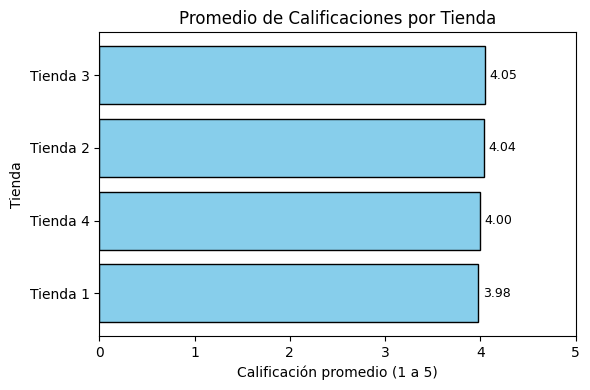

In [119]:
# Calcular el promedio de calificaciones por tienda y ordenar
calificaciones_por_tienda = (
    df_tiendas.groupby('Tienda')['Calificación']
    .mean()
    .reset_index()
    .sort_values('Calificación', ascending=False)
)

# Gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.barh(calificaciones_por_tienda['Tienda'], calificaciones_por_tienda['Calificación'],
               color='skyblue', edgecolor='black')

# Invertir eje Y para que el mayor quede arriba
ax.invert_yaxis()

# Etiquetas y estilo
ax.set_title('Promedio de Calificaciones por Tienda')
ax.set_xlabel('Calificación promedio (1 a 5)')
ax.set_ylabel('Tienda')
ax.set_xlim(0, 5)

# Mostrar el valor a la derecha de la barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
            f"{width:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [107]:
ventas_productos = df_tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
top_productos = ventas_productos.sort_values(['Tienda', 'Cantidad'], ascending=[True, False]).groupby('Tienda').head(5)
bottom_productos = ventas_productos.sort_values(['Tienda', 'Cantidad'], ascending=[True, True]).groupby('Tienda').head(5)

print("\nTop 5 productos más vendidos por tienda:")
print(top_productos)

print("\nTop 5 productos menos vendidos por tienda:")
print(bottom_productos)


Top 5 productos más vendidos por tienda:
       Tienda                   Producto  Cantidad
1    Tienda 1                    Armario        60
33   Tienda 1                 Microondas        60
48   Tienda 1              TV LED UHD 4K        60
40   Tienda 1           Secadora de ropa        58
9    Tienda 1    Bloques de construcción        56
75   Tienda 2  Iniciando en programación        65
84   Tienda 2                 Microondas        62
58   Tienda 2                    Batería        61
72   Tienda 2          Guitarra acústica        58
89   Tienda 2                  Pandereta        58
129  Tienda 3              Kit de bancas        57
113  Tienda 3                  Cama king        56
133  Tienda 3            Mesa de comedor        56
134  Tienda 3              Mesa de noche        55
143  Tienda 3               Set de ollas        55
163  Tienda 4                   Cama box        62
168  Tienda 4                 Cubertería        59
164  Tienda 4                  Cama king

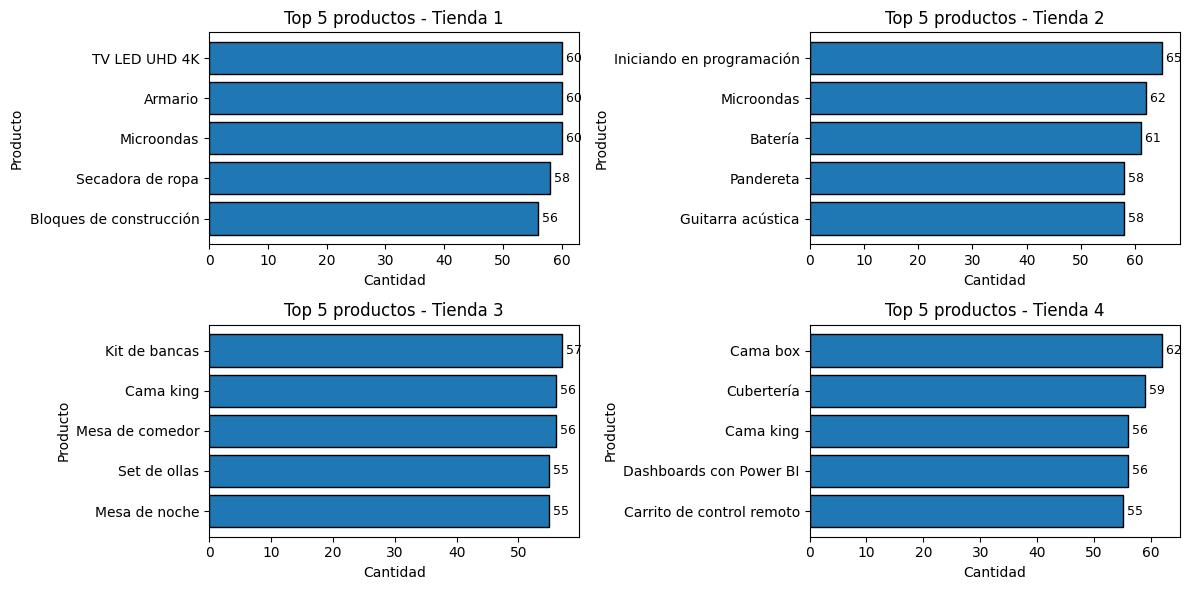

In [121]:
# Asegurar orden y tomar 5 por tienda
top5_por_tienda = (ventas_productos
                   .sort_values(['Tienda', 'Cantidad'], ascending=[True, False])
                   .groupby('Tienda')
                   .head(5))

tiendas = sorted(top5_por_tienda['Tienda'].unique())

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

for i, tienda_name in enumerate(tiendas):
    ax = axes[i]
    sub = (top5_por_tienda[top5_por_tienda['Tienda'] == tienda_name]
           .sort_values('Cantidad', ascending=True))  # asc para que barh muestre el mayor arriba
    ax.barh(sub['Producto'], sub['Cantidad'], edgecolor='black')
    ax.set_title(f'Top 5 productos - {tienda_name}')
    ax.set_xlabel('Cantidad')
    ax.set_ylabel('Producto')

    # Etiquetas con valor al final de cada barra
    for j, (prod, val) in enumerate(zip(sub['Producto'], sub['Cantidad'])):
        ax.text(val, j, f' {int(val)}', va='center', ha='left', fontsize=9)

# Si por alguna razón hay menos de 4 tiendas, ocultar ejes sobrantes
for k in range(len(tiendas), 4):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [109]:
# Calcular el costo de envío promedio por tienda
envio_promedio_por_tienda = (
    df_tiendas.groupby('Tienda', as_index=False)['Costo de envío']
    .mean()
    .sort_values(by='Costo de envío', ascending=False)
)

# Mostrar tabla con separadores de miles para mejor lectura
envio_promedio_por_tienda['Costo de envío'] = envio_promedio_por_tienda['Costo de envío'].map(lambda x: f"${x:,.0f}")

print("Costo de envío promedio por tienda:")
print(envio_promedio_por_tienda.to_string(index=False))


Costo de envío promedio por tienda:
  Tienda Costo de envío
Tienda 1        $26,019
Tienda 2        $25,216
Tienda 3        $24,806
Tienda 4        $23,459



# **Extra**

In [110]:
# Copia de trabajo
geo = df_tiendas.copy()

# Asegurar tipo numérico y filtrar coordenadas válidas
for c in ['lat', 'lon', 'Precio']:
    if c in geo.columns:
        geo[c] = pd.to_numeric(geo[c], errors='coerce')

geo = geo.dropna(subset=['lat', 'lon'])
geo = geo[(geo['lat'].between(-90, 90)) & (geo['lon'].between(-180, 180))]

print(f"Registros con coordenadas válidas: {len(geo):,}")
geo[['Tienda', 'lat', 'lon']].head()

Registros con coordenadas válidas: 9,435


,Tienda,lat,lon
0,Tienda 1,4.60971,-74.08175
1,Tienda 1,6.25184,-75.56359
2,Tienda 1,10.39972,-75.51444
3,Tienda 1,3.43722,-76.52250
4,Tienda 1,6.25184,-75.56359


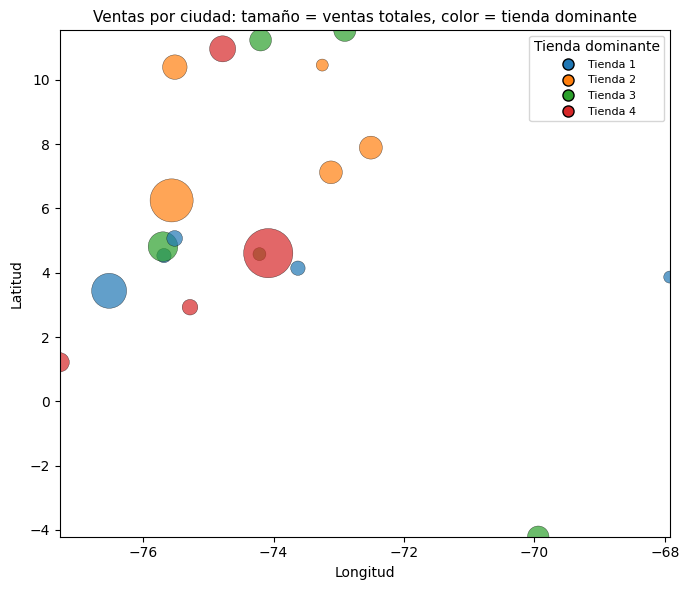

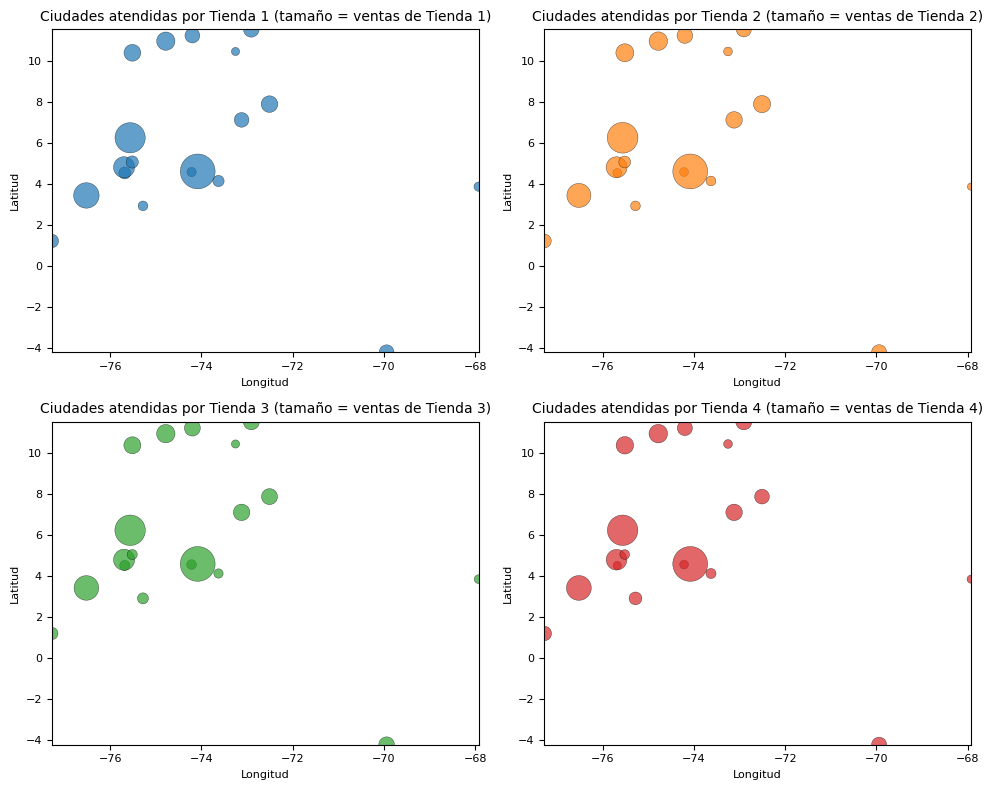

In [122]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- 1) Agregaciones por ciudad y tienda ---
# Ventas por ciudad (lat, lon) y tienda
ventas_por_ciudad = (
    geo.groupby(['lat', 'lon', 'Tienda'])
       .size()
       .reset_index(name='ventas')
)

# Ventas totales por ciudad (sumando todas las tiendas)
totales_ciudad = (ventas_por_ciudad
                  .groupby(['lat','lon'], as_index=False)['ventas']
                  .sum()
                  .rename(columns={'ventas':'ventas_totales'}))

# Tienda dominante por ciudad (la de mayor ventas en esa ciudad)
dom_ciudad = (ventas_por_ciudad
              .sort_values(['lat','lon','ventas'], ascending=[True, True, False])
              .drop_duplicates(['lat','lon'])
              .rename(columns={'Tienda':'Tienda_dominante', 'ventas':'ventas_dom'}))

# Dataset final para pintar: una fila por ciudad
plot_dom = (totales_ciudad
            .merge(dom_ciudad[['lat','lon','Tienda_dominante','ventas_dom']],
                   on=['lat','lon'], how='left'))

# --- 2) Mapa general: tamaño = ventas totales en ciudad, color = tienda dominante ---
# Escala de tamaño (raíz para no tener burbujas gigantes)
sizes = np.sqrt(plot_dom['ventas_totales']) * 20  # ajusta 20 si quieres más/menos tamaño

# Paleta por tienda
tiendas = sorted(geo['Tienda'].unique())
cmap = plt.get_cmap('tab10')
color_map = {t: cmap(i % 10) for i, t in enumerate(tiendas)}
colors = plot_dom['Tienda_dominante'].map(color_map)

# Límites comunes para comparación
lon_min, lon_max = geo['lon'].min(), geo['lon'].max()
lat_min, lat_max = geo['lat'].min(), geo['lat'].max()

plt.figure(figsize=(7,6))
plt.scatter(plot_dom['lon'], plot_dom['lat'],
            s=sizes, c=colors, alpha=0.7,
            edgecolor='k', linewidths=0.3)

plt.title('Ventas por ciudad: tamaño = ventas totales, color = tienda dominante', fontsize=11)
plt.xlabel('Longitud'); plt.ylabel('Latitud')
plt.xlim(lon_min, lon_max); plt.ylim(lat_min, lat_max)
plt.tight_layout()

# Leyenda de tiendas (colores)
legend_elements = [Line2D([0],[0], marker='o', linestyle='',
                          markerfacecolor=color_map[t], markeredgecolor='k',
                          markersize=8, label=t) for t in tiendas]
plt.legend(handles=legend_elements, title='Tienda dominante', loc='best', fontsize=8)
plt.show()

# --- 3) Subplots por tienda: tamaño = ventas de esa tienda en cada ciudad ---
rows = int(np.ceil(len(tiendas)/2))
fig, axes = plt.subplots(rows, 2, figsize=(10, 4*rows))
axes = np.atleast_1d(axes).flatten()

for ax, t in zip(axes, tiendas):
    sub = ventas_por_ciudad[ventas_por_ciudad['Tienda'] == t].copy()
    sub_sizes = np.sqrt(sub['ventas']) * 20  # mismo escalado
    ax.scatter(sub['lon'], sub['lat'],
               s=sub_sizes, alpha=0.7,
               c=[color_map[t]]*len(sub),
               edgecolor='k', linewidths=0.3)
    ax.set_title(f'Ciudades atendidas por {t} (tamaño = ventas de {t})', fontsize=10)
    ax.set_xlabel('Longitud', fontsize=8)
    ax.set_ylabel('Latitud', fontsize=8)
    ax.set_xlim(lon_min, lon_max); ax.set_ylim(lat_min, lat_max)
    ax.tick_params(axis='both', labelsize=8)

for k in range(len(tiendas), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()


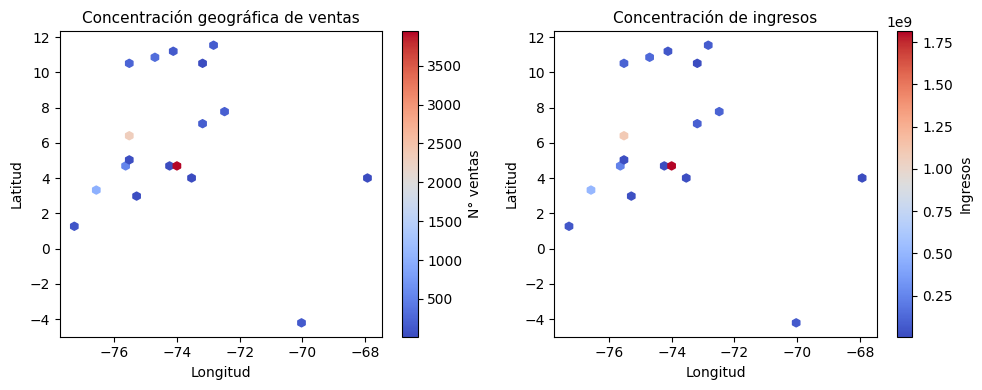

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Hexbin densidad de ventas
hb1 = axes[0].hexbin(geo['lon'], geo['lat'], gridsize=40, mincnt=1, cmap='coolwarm')
axes[0].set_title('Concentración geográfica de ventas', fontsize=11)
axes[0].set_xlabel('Longitud'); axes[0].set_ylabel('Latitud')
cb1 = fig.colorbar(hb1, ax=axes[0], orientation='vertical')
cb1.set_label('N° ventas')

# Hexbin densidad de ingresos
if 'Precio' in geo.columns:
    hb2 = axes[1].hexbin(geo['lon'], geo['lat'], C=geo['Precio'],
                         reduce_C_function=np.sum, gridsize=40, mincnt=1, cmap='coolwarm')
    axes[1].set_title('Concentración de ingresos', fontsize=11)
    axes[1].set_xlabel('Longitud'); axes[1].set_ylabel('Latitud')
    cb2 = fig.colorbar(hb2, ax=axes[1], orientation='vertical')
    cb2.set_label('Ingresos')

plt.tight_layout()
plt.show()


In [113]:
# KPI con mayor peso a margen total
# 0) Limpieza
df = df_tiendas.copy()
for col in ['Precio', 'Costo de envío', 'Calificación']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Precio', 'Costo de envío', 'Calificación'])

# 1) Métrica de margen (proxy de rentabilidad por pedido)
df['Margen'] = df['Precio'] - df['Costo de envío']

# 2) KPIs por tienda
kpi = df.groupby('Tienda').agg(
    Pedidos=('Producto', 'count'),
    Ingresos=('Precio', 'sum'),
    MargenTotal=('Margen', 'sum'),
    TicketPromedio=('Precio', 'mean'),
    CalificacionPromedio=('Calificación', 'mean'),
    EnvioPromedio=('Costo de envío', 'mean'),
).reset_index()

# 3) Normalización Min-Max (beneficios ↑, costos ↓)
def minmax(s):
    return (s - s.min())/(s.max() - s.min()) if s.max()!=s.min() else 1

kpi_norm = kpi.copy()
kpi_norm['Ingresos_n'] = minmax(kpi['Ingresos'])
kpi_norm['MargenTotal_n'] = minmax(kpi['MargenTotal'])
kpi_norm['TicketPromedio_n'] = minmax(kpi['TicketPromedio'])
kpi_norm['CalificacionPromedio_n'] = minmax(kpi['CalificacionPromedio'])
kpi_norm['EnvioPromedio_n'] = 1 - minmax(kpi['EnvioPromedio'])  # menor costo = mejor

# 4) Pesos del Índice de Eficiencia (Ajustable)
pesos = {
    'MargenTotal_n': 0.45,     # peso principal: rentabilidad total
    'CalificacionPromedio_n': 0.20,  # satisfacción del cliente
    'TicketPromedio_n': 0.15,  # calidad del ingreso
    'Ingresos_n': 0.10,        # volumen bruto
    'EnvioPromedio_n': 0.10,   # eficiencia logística
}

# 5) Cálculo del IE y ranking (mayor = mejor)
kpi_norm['IE'] = sum(kpi_norm[c]*w for c,w in pesos.items())
kpi_norm = kpi_norm.sort_values('IE', ascending=False).reset_index(drop=True)

# 6) Determinar tienda menos eficiente (para vender)
tienda_menos_eficiente = kpi_norm.iloc[-1]['Tienda']

print("KPIs por tienda:")
print(kpi.round(2).to_string(index=False))
print("\nPuntajes normalizados y IE:")
cols_out = ['Tienda','IE','Ingresos_n','MargenTotal_n','TicketPromedio_n','CalificacionPromedio_n','EnvioPromedio_n']
print(kpi_norm[cols_out].round(3).to_string(index=False))

print(f"\n➡️ Recomendación: vender **{tienda_menos_eficiente}** (menor IE).")

# 7) Explicación corta, destacando los 2 peores drivers de esa tienda
fila = kpi_norm[kpi_norm['Tienda']==tienda_menos_eficiente].iloc[0]
drivers = {
    'MargenTotal_n':'margen total',
    'CalificacionPromedio_n':'calificación promedio',
    'TicketPromedio_n':'ticket promedio',
    'Ingresos_n':'ingresos',
    'EnvioPromedio_n':'costo de envío',
}
peores = sorted(drivers.keys(), key=lambda c: fila[c])[:2]
print("Principales motivos:")
for p in peores:
    print(f" - Bajo desempeño relativo en {drivers[p]}.")


KPIs por tienda:
  Tienda  Pedidos     Ingresos  MargenTotal  TicketPromedio  CalificacionPromedio  EnvioPromedio
Tienda 1     2359 1150880400.0 1089502500.0       487867.91                  3.98       26018.61
Tienda 2     2359 1116343500.0 1056858400.0       473227.43                  4.04       25216.24
Tienda 3     2359 1098019600.0 1039503000.0       465459.77                  4.05       24805.68
Tienda 4     2358 1038375700.0  983058300.0       440362.89                  4.00       23459.46

Puntajes normalizados y IE:
  Tienda    IE  Ingresos_n  MargenTotal_n  TicketPromedio_n  CalificacionPromedio_n  EnvioPromedio_n
Tienda 1 0.700       1.000          1.000             1.000                   0.000            0.000
Tienda 2 0.686       0.693          0.693             0.692                   0.846            0.314
Tienda 3 0.618       0.530          0.530             0.528                   1.000            0.474
Tienda 4 0.153       0.000          0.000             0.000      

In [114]:
# KPI con mismo peso relativo por variable
# 0) Limpieza
df = df_tiendas.copy()
for col in ['Precio', 'Costo de envío', 'Calificación']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Precio', 'Costo de envío', 'Calificación'])

# 1) Métrica de margen (proxy de rentabilidad por pedido)
df['Margen'] = df['Precio'] - df['Costo de envío']

# 2) KPIs por tienda
kpi = df.groupby('Tienda').agg(
    Pedidos=('Producto', 'count'),
    Ingresos=('Precio', 'sum'),
    MargenTotal=('Margen', 'sum'),
    TicketPromedio=('Precio', 'mean'),
    CalificacionPromedio=('Calificación', 'mean'),
    EnvioPromedio=('Costo de envío', 'mean'),
).reset_index()

# 3) Normalización Min-Max (beneficios ↑, costos ↓)
def minmax(s):
    return (s - s.min())/(s.max() - s.min()) if s.max()!=s.min() else 1

kpi_norm = kpi.copy()
kpi_norm['Ingresos_n'] = minmax(kpi['Ingresos'])
kpi_norm['MargenTotal_n'] = minmax(kpi['MargenTotal'])
kpi_norm['TicketPromedio_n'] = minmax(kpi['TicketPromedio'])
kpi_norm['CalificacionPromedio_n'] = minmax(kpi['CalificacionPromedio'])
kpi_norm['EnvioPromedio_n'] = 1 - minmax(kpi['EnvioPromedio'])  # menor costo = mejor

# 4) Pesos del Índice de Eficiencia (Ajustable)
pesos = {
    'MargenTotal_n': 0.2,     # peso principal: rentabilidad total
    'CalificacionPromedio_n': 0.20,  # satisfacción del cliente
    'TicketPromedio_n': 0.2,  # calidad del ingreso
    'Ingresos_n': 0.2,        # volumen bruto
    'EnvioPromedio_n': 0.2,   # eficiencia logística
}

# 5) Cálculo del IE y ranking (mayor = mejor)
kpi_norm['IE'] = sum(kpi_norm[c]*w for c,w in pesos.items())
kpi_norm = kpi_norm.sort_values('IE', ascending=False).reset_index(drop=True)

# 6) Determinar tienda menos eficiente (para vender)
tienda_menos_eficiente = kpi_norm.iloc[-1]['Tienda']

print("KPIs por tienda:")
print(kpi.round(2).to_string(index=False))
print("\nPuntajes normalizados y IE:")
cols_out = ['Tienda','IE','Ingresos_n','MargenTotal_n','TicketPromedio_n','CalificacionPromedio_n','EnvioPromedio_n']
print(kpi_norm[cols_out].round(3).to_string(index=False))

print(f"\n➡️ Recomendación: vender **{tienda_menos_eficiente}** (menor IE).")

# 7) Explicación corta, destacando los 2 peores drivers de esa tienda
fila = kpi_norm[kpi_norm['Tienda']==tienda_menos_eficiente].iloc[0]
drivers = {
    'MargenTotal_n':'margen total',
    'CalificacionPromedio_n':'calificación promedio',
    'TicketPromedio_n':'ticket promedio',
    'Ingresos_n':'ingresos',
    'EnvioPromedio_n':'costo de envío',
}
peores = sorted(drivers.keys(), key=lambda c: fila[c])[:2]
print("Principales motivos:")
for p in peores:
    print(f" - Bajo desempeño relativo en {drivers[p]}.")


KPIs por tienda:
  Tienda  Pedidos     Ingresos  MargenTotal  TicketPromedio  CalificacionPromedio  EnvioPromedio
Tienda 1     2359 1150880400.0 1089502500.0       487867.91                  3.98       26018.61
Tienda 2     2359 1116343500.0 1056858400.0       473227.43                  4.04       25216.24
Tienda 3     2359 1098019600.0 1039503000.0       465459.77                  4.05       24805.68
Tienda 4     2358 1038375700.0  983058300.0       440362.89                  4.00       23459.46

Puntajes normalizados y IE:
  Tienda    IE  Ingresos_n  MargenTotal_n  TicketPromedio_n  CalificacionPromedio_n  EnvioPromedio_n
Tienda 2 0.648       0.693          0.693             0.692                   0.846            0.314
Tienda 3 0.613       0.530          0.530             0.528                   1.000            0.474
Tienda 1 0.600       1.000          1.000             1.000                   0.000            0.000
Tienda 4 0.253       0.000          0.000             0.000      

# 📊 Informe Final – Evaluación de Tiendas Alura Store

## 📝 Introducción
El propósito de este análisis es brindar al Sr. Juan una visión completa del desempeño de sus cuatro tiendas para determinar cuál vender y así financiar un nuevo emprendimiento.  
Se han evaluado múltiples aspectos del rendimiento comercial y operativo: **ingresos totales**, **composición de ventas por categoría**, **calificaciones promedio de clientes**, **productos más y menos vendidos**, **costos de envío promedio** y un **Índice de Eficiencia (IE)** que pondera por igual los indicadores clave.

---

## 1️⃣ Ingresos Totales
Entre las cuatro tiendas, la que presenta el **mayor ingreso total** es **Tienda 1**, mientras que la de **menor ingreso total** es **Tienda 4**.  
Las otras dos tiendas se ubican en un rango intermedio, con montos relativamente cercanos entre sí.  
Esta diferencia en ingresos refleja que no todas las tiendas tienen el mismo nivel de captación de ventas, lo cual puede deberse a factores como ubicación, surtido, estrategias de marketing o fidelidad de clientes.

---

## 2️⃣ Categorías de Productos
En términos generales, las categorías **Muebles**, **Electrónicos** y **Juguetes** lideran las ventas globales.  
Sin embargo, no todas las tiendas tienen la misma fortaleza en estas categorías:

- **Tienda 1** y **Tienda 2** concentran un volumen alto y consistente en categorías líderes.  
- **Tienda 4**, aunque mantiene presencia en ellas, muestra volúmenes e ingresos menores en comparación.  

Esta menor fuerza en categorías clave puede limitar su capacidad de competir frente a otras tiendas de la cadena.

---

## 3️⃣ Calificación Promedio
Las calificaciones de los clientes varían levemente entre las tiendas, con valores en el rango de **3,98 a 4,05** sobre 5.  

- **Tienda 2** y **Tienda 3** presentan las calificaciones más altas, lo que sugiere una experiencia de compra más satisfactoria o productos mejor valorados.  
- **Tienda 4** y **Tienda 1** tienen calificaciones apenas inferiores, pero aún dentro de un rango aceptable.

---

## 4️⃣ Productos más y menos vendidos
En todas las tiendas hay productos de alta rotación que impulsan las ventas, pero también existe inventario con ventas reducidas.  

- En **Tienda 4**, algunos productos de baja rotación se concentran en categorías relevantes, lo que puede afectar la eficiencia de su inventario.  
- **Tienda 1** y **Tienda 2**, en cambio, logran que sus productos más vendidos se alineen con artículos de alto valor para el cliente y con buena salida comercial.

---

## 5️⃣ Costos de Envío Promedio
El costo logístico promedio es más bajo en **Tienda 4**, lo que en principio podría ser una ventaja.  
Sin embargo, este factor aislado no compensa las diferencias en ingresos, margen total y ticket promedio frente al resto de las tiendas.

---

## 6️⃣ Índice de Eficiencia (IE)
El IE integra ingresos, margen total, ticket promedio, calificación promedio y eficiencia logística.  

- **Tienda 2** encabeza el ranking, seguida de **Tienda 3** y **Tienda 1** con puntajes similares.  
- **Tienda 4** queda significativamente por debajo, penalizada especialmente por un margen total más bajo y un ticket promedio inferior.

---

## 🏁 Conclusión y Recomendación
El análisis muestra que:

- **Tienda 1** es la de **mayores ingresos** y fuerte en categorías clave.  
- **Tienda 2** y **Tienda 3** combinan buen ingreso, calificación alta y desempeño equilibrado.  
- **Tienda 4** presenta el **menor ingreso**, menor margen total y ticket promedio, y una menor fortaleza en las categorías líderes, aunque con ventaja en costo de envío.  

**✅ Recomendación:** Vender **Tienda 4**, ya que su desempeño global es inferior y su contribución relativa a la cadena es la más baja, mientras que el resto de las tiendas exhiben mejores perspectivas de crecimiento y rentabilidad.
